# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [159]:
# Carregando base de gorjetas
tips = sns.load_dataset("tips")
# % Gorjeta do Valor Líquido da Conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
# Valor Líquido da Conta
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [160]:
# 1)
# Definindo a matriz de design, gorjeta será explicada por sexo, fumante, valor liquido conta.
y, X = patsy.dmatrices('tip ~ sex + smoker + net_bill', data=tips, return_type='dataframe')
X

,Intercept,sex[T.Female],smoker[T.No],net_bill
0,1.0,1.0,1.0,15.98
1,1.0,0.0,1.0,8.68
2,1.0,0.0,1.0,17.51
3,1.0,0.0,1.0,20.37
4,1.0,1.0,1.0,20.98
...,...,...,...,...
239,1.0,0.0,1.0,23.11
240,1.0,1.0,0.0,25.18
241,1.0,0.0,0.0,20.67
242,1.0,0.0,1.0,16.07


In [161]:

# Ajustando o modelo de Regressão
modelo = sm.OLS(y,X).fit()
# Analisando o sumário do modelo
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.28
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.03e-21
Time:                        08:48:45   Log-Likelihood:                -375.19
No. Observations:                 244   AIC:                             758.4
Df Residuals:                     240   BIC:                             772.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2386      0.215      5.768      0.000       0.816       1.662
sex[T.Female]    -0.0135      0.153     -0.088      0.930      -0.316       0.289
smoker[T.No]      0.1383      0.150      0.920      0.359      -0.158       0.434
net_bill          0.1000      0.009     10.862      0.000       0.082       0.118
==============================================================================
Omnibus:                       36.851   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.361
Skew:                           0.807   Prob(JB):                     3.89e-15
Kurtosis:                       4.981   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
# 2)

y, X = patsy.dmatrices('tip ~ net_bill', data=tips, return_type='dataframe')
# Ajustando o modelo de Regressão
modelo = sm.OLS(y,X).fit()
# Analisando o sumário do modelo
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        08:48:53   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* As variaveis Sex, Smoker e Time não são significantes e serão removidas. 
Após a remoção o R² não sofreu grandes alterações.


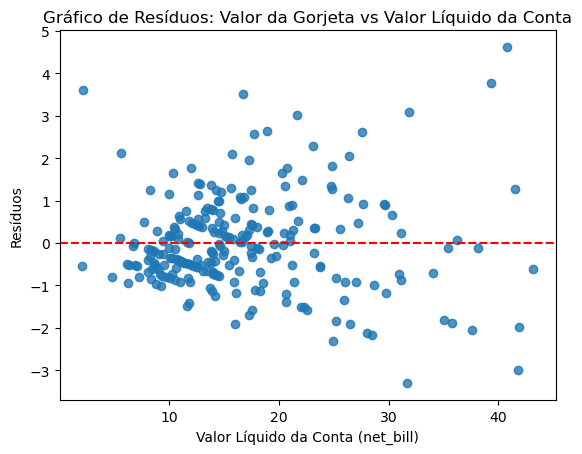

In [163]:
# 3)

# Gráfico de resíduos em função de net_bill
sns.residplot(x='net_bill', y=modelo.resid, data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos: Valor da Gorjeta vs Valor Líquido da Conta')
plt.show()

In [164]:
# 4) 
# log
modelo_log = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.40e-20
Time:                        08:49:02   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

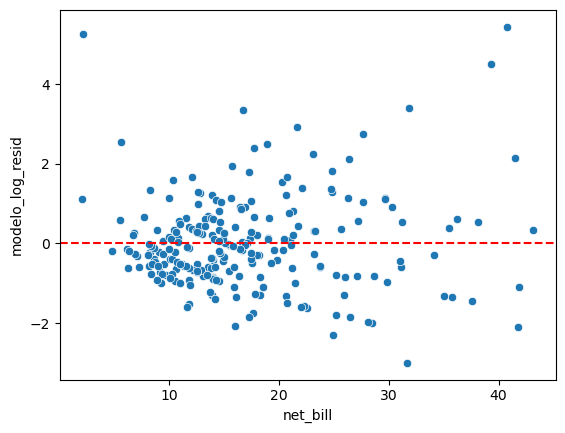

In [165]:
tips['modelo_log_resid'] = modelo_log.resid
sns.scatterplot(x = 'net_bill', y = tips['modelo_log_resid'], data = tips)
plt.axhline(y=0, color='r', linestyle='--')


In [166]:
# Polinômio

# Ajustando Modelo de Regressão com net_bill Transformado em um Polinômio
modelo_pol = smf.ols('tip ~ net_bill + np.square(net_bill)', data = tips).fit()
modelo_pol.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.96e-22
Time:                        08:49:19   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                0.1288      0.037      3.493      0.001       0.056       0.202
np.square(net_bill)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

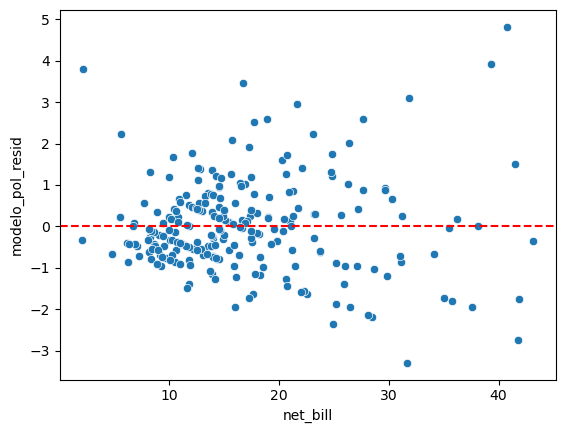

In [167]:
tips['modelo_pol_resid'] = modelo_pol.resid
sns.scatterplot(x = 'net_bill', y = tips['modelo_pol_resid'], data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Resposta:**  Os modelos ficaram com R² abaixo do modelo original, porém o mais próximo foi o modelo com Polinômio.

In [168]:
# Comparações
print(" *** MODELO ORIGINAL: *** ")
print(modelo.summary())

print("\n *** MODELO COM LOG: *** ")
print(modelo_log.summary())

print("\n *** MODELO COM POLINOMIO *** ")
print(modelo_pol.summary())

 *** MODELO ORIGINAL: *** 
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        08:49:38   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307    

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [169]:
# 1)
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [171]:
modelo2 = sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.21e-18
Time:                        08:51:00   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
# 2)
modelo2_log = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()
modelo2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           2.60e-21
Time:                        08:51:05   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

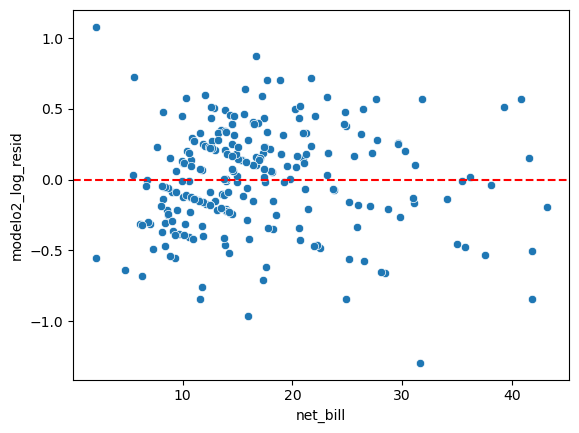

In [173]:
# 3)
tips['modelo2_log_resid'] = modelo2_log.resid
sns.scatterplot(x = 'net_bill', y = tips['modelo2_log_resid'], data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [174]:
# 4)
modelo2_log2 = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()
modelo2_log2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           5.62e-22
Time:                        08:51:20   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

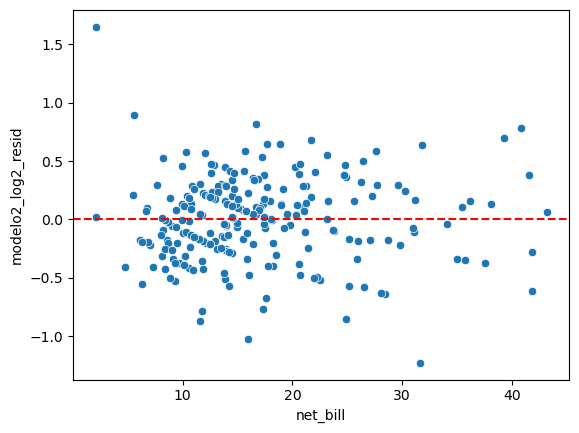

In [175]:
tips['modelo2_log2_resid'] = modelo2_log2.resid

sns.scatterplot(x = 'net_bill', y = tips['modelo2_log2_resid'], data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [176]:
# Polinômio

modelo2_pol = smf.ols('tip ~ net_bill + np.square(net_bill)', data = tips).fit()
modelo2_pol.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.96e-22
Time:                        08:52:59   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                0.1288      0.037      3.493      0.001       0.056       0.202
np.square(net_bill)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

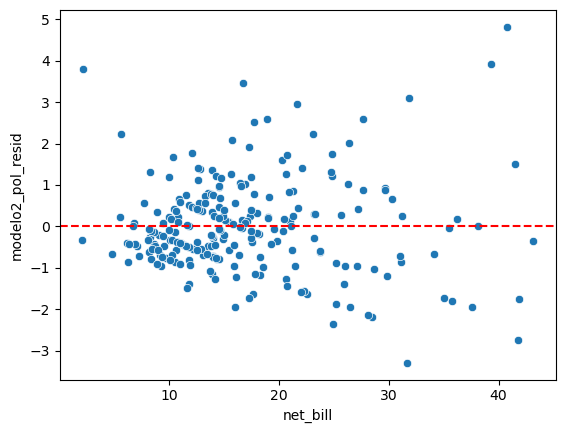

In [177]:
tips['modelo2_pol_resid'] = modelo2_pol.resid

sns.scatterplot(x = 'net_bill', y = tips['modelo2_pol_resid'], data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Resposta:**  O último modelo tem o melhor R², sendo assim a melhor escolha dentre as disponíveis.

In [178]:
# 5)

# R² Modelo do item 1
R_squared_log = modelo2.rsquared
print("R² na escala original (Modelo item 1):", R_squared_log)

# R² último Modelo
R_squared_pol = modelo2_pol.rsquared
print("R² na escala original (Último Modelo):", R_squared_pol)


R² na escala original (Modelo item 1): 0.3132389303427351
R² na escala original (Último Modelo): 0.3344216007656947


**Resposta:**  O último modelo tem o melhor R²

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [180]:
# 1)
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [182]:
# Verificando como esta df e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [184]:
#Linhas nulas
df.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [185]:
df['tempo_emprego'].unique

<bound method Series.unique of 0         6.602740
1         7.183562
2         0.838356
3         4.846575
4         4.293151
           ...    
14995    13.887671
14996          NaN
14997     7.832877
14998     4.298630
14999     7.219178
Name: tempo_emprego, Length: 15000, dtype: float64>

In [186]:
# 1)
modelo3 = smf.ols('renda ~ tempo_emprego', data = df).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:02:41   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

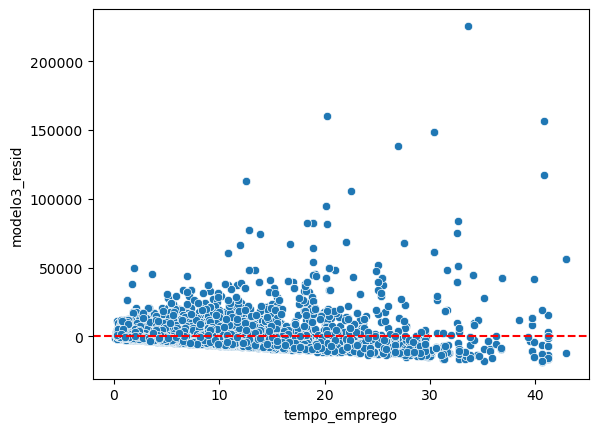

In [187]:
# 2)
df['modelo3_resid'] = modelo3.resid
sns.scatterplot(x = 'tempo_emprego', y = df['modelo3_resid'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

Modelo possuí resido ruim e esta com padrão cone. Podemos melhorar utilizando Log na variavel X.

In [188]:
modelo3_log = smf.ols('np.log(renda) ~ tempo_emprego', data = df).fit()
modelo3_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:06:52   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

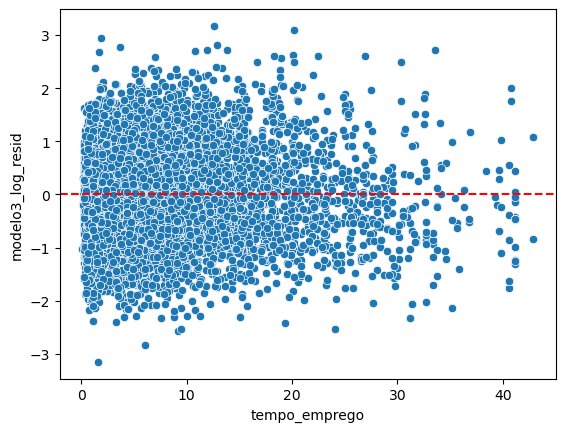

In [189]:

df['modelo3_log_resid'] = modelo3_log.resid
sns.scatterplot(x = 'tempo_emprego', y = df['modelo3_log_resid'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [206]:
# 3) e 4)
modelo3_full = smf.ols('np.log(renda) ~ sexo + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos + C(educacao) ', 
                       data = df).fit()
modelo3_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     669.3
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:54:15   Log-Likelihood:                -13637.
No. Observations:               12427   AIC:                         2.730e+04
Df Residuals:                   12416   BIC:                         2.738e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.1750      0.083     86.436      0.000       7.012       7.338
sexo[T.M]                              0.7938      0.014     57.342      0.000       0.767       0.821
C(posse_de_imovel)[T.True]             0.0846      0.014      6.148      0.000       0.058       0.112
C(educacao)[T.Pós graduação]           0.1632      0.159      1.024      0.306      -0.149       0.476
C(educacao)[T.Secundário]              0.0011      0.072      0.015      0.988      -0.140       0.142
C(educacao)[T.Superior completo]       0.1250      0.072      1.729      0.084      -0.017       0.267
C(educacao)[T.Superior incompleto]    -0.0202      0.078     -0.259      0.796      -0.173       0.132
idade                                  0.0053      0.001      6.846      0.000       0.004       0.007
tempo_emprego                          0.0608      0.001     59.060      0.000       0.059       0.063
qt_pessoas_residencia                  0.0001      0.016      0.009      0.993      -0.032       0.032
qtd_filhos                             0.0241      0.019      1.245      0.213      -0.014       0.062
==============================================================================
Omnibus:                        0.834   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.827
Skew:                           0.020   Prob(JB):                        0.661
Kurtosis:                       3.003   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

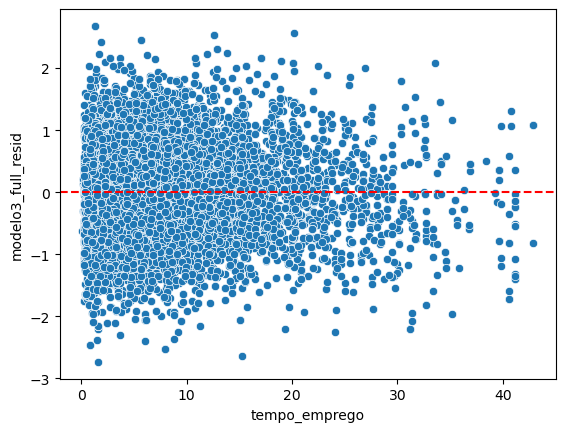

In [207]:
df['modelo3_full_resid'] = modelo3_full.resid
sns.scatterplot(x = 'tempo_emprego', y = df['modelo3_full_resid'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

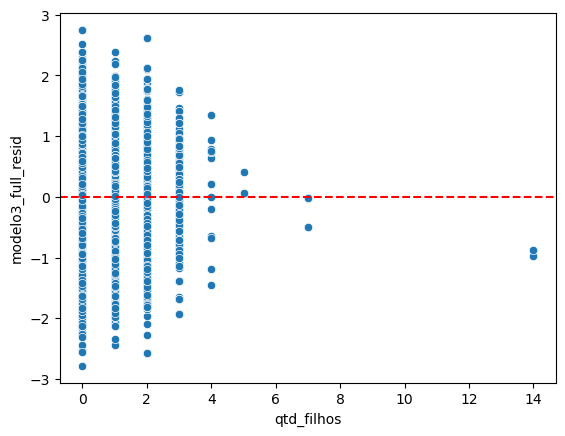

In [203]:
# 5) 
# Analisando qtd_filhos
sns.scatterplot(x = 'qtd_filhos', y = df['modelo3_full_resid'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='educacao', ylabel='modelo3_full_resid'>

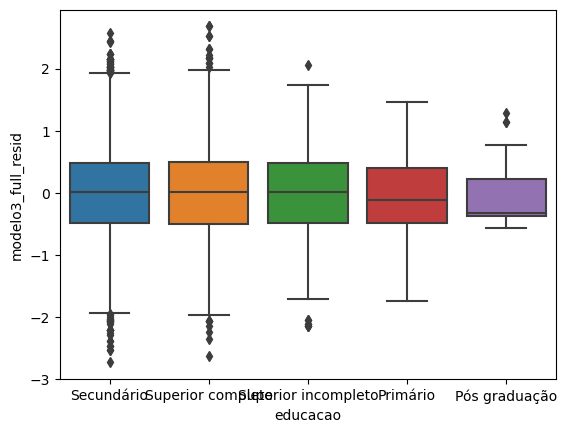

In [210]:
# Analisando educacao
sns.boxplot(x = 'educacao', y = 'modelo3_full_resid', data = df)

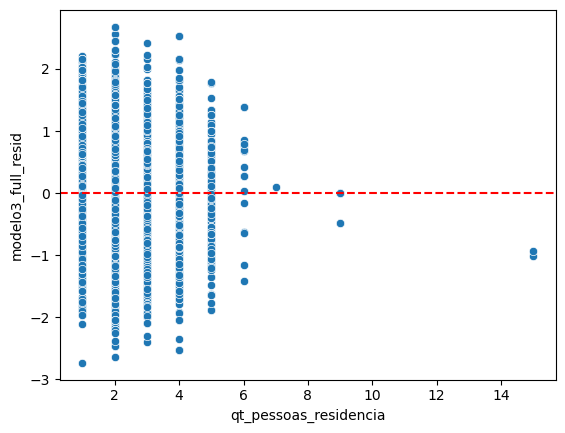

In [209]:
# Analisando qt_pessoas_residencia
sns.scatterplot(x = 'qt_pessoas_residencia', y = df['modelo3_full_resid'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='posse_de_imovel', ylabel='modelo3_full_resid'>

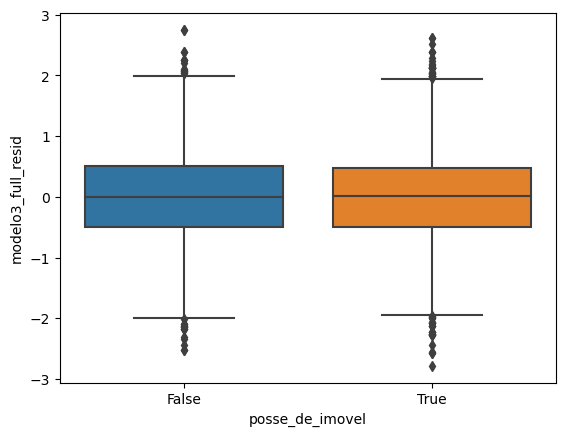

In [194]:
# Analisando posse_de_imovel
sns.boxplot(x = 'posse_de_imovel', y = 'modelo3_full_resid', data = df)

<Axes: xlabel='sexo', ylabel='modelo3_full_resid'>

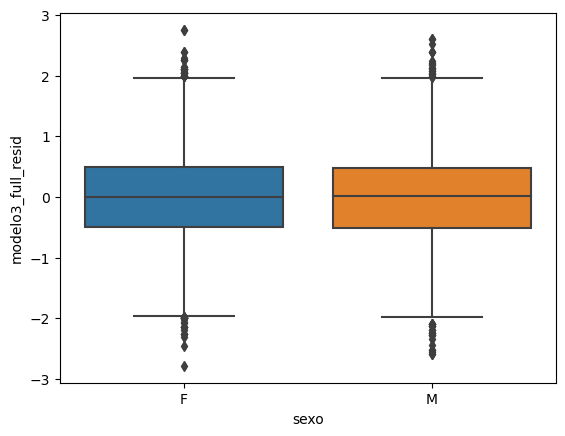

In [195]:
# Analisando sexo
sns.boxplot(x = 'sexo', y = 'modelo3_full_resid', data = df)

As variaveis possuem residuo suficiente para serem mantidas...
